## Coverage for ZTF
We shall make four coverage plots: Equatorial/Galactic and filter-r/filter-g. The area of each blob is the number of candidates found in that field.

In [19]:
import mysql.connector
import numpy as np

from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Query the database. nid is the night ID that started on 1 Jan 2017. The 27 Nov 2019 has nid = 1060

In [20]:
from ztf import settings
msl = mysql.connector.connect(\
            user    =settings.DB_USER, \
            password=settings.DB_PASS, \
            host    =settings.DB_HOST, \
            database='ztf')
cursor = msl.cursor(buffered=True, dictionary=True)
nid1 = 1000
nid2 = 1060
query = 'SELECT field,fid,ra,decl,glong,glat,SUM(n) as n '
query += 'FROM coverage NATURAL JOIN fields '
query += 'WHERE nid BETWEEN %d and %d GROUP BY field,fid,ra,decl' % (nid1, nid2)
cursor.execute(query)
n = cursor.rowcount

In [21]:
def makeplot(fid, longname, longlist, latname, latlist, nlist):
    slist = np.array(nlist, dtype=np.float32)
    slist = 200*np.sqrt(slist/np.amax(slist))
    t = Table([np.array(longlist), np.array(latlist)], names=(longname, latname))
    long = coord.Angle(t[longname]*u.degree)
    long = long.wrap_at(180*u.degree)
    lat  = coord.Angle(t[latname]*u.degree)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection="mollweide")
    ax.grid()
    filter = 'g'
    if fid == 1: filter = 'r'
    plt.title('Coverage %s,%s in filter %s with %d fields' \
              % (longname, latname, filter, len(longlist)))
    ax.scatter(long.radian, lat.radian, s=slist, c=filter)

Extract lists of coordinates from the database cursor.

In [22]:
ralist = [[],[]]
delist = [[],[]]
gglist = [[],[]]
gtlist = [[],[]]
nlist  = [[],[]]
i = 0
for row in cursor:
    fid = row['fid']-1
    ralist[fid].append(row['ra'])
    delist[fid].append(row['decl'])
    gglist[fid].append(row['glong'])
    gtlist[fid].append(row['glat'])
    nlist[fid].append(row['n'])
cursor.close()

True

Make plots in equatorial (RA/Dec)

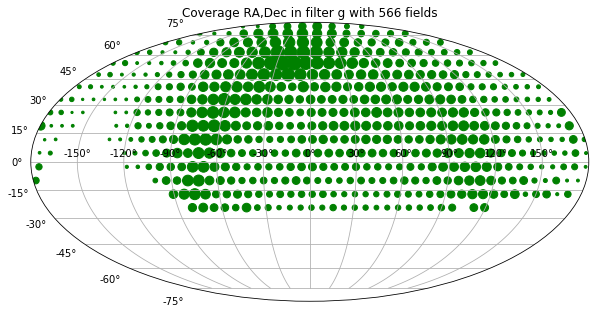

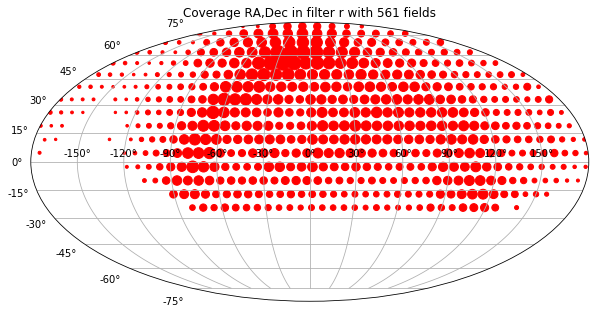

In [23]:
for fid in range(2):
    makeplot(fid, 'RA', ralist[fid], 'Dec', delist[fid], nlist[fid])

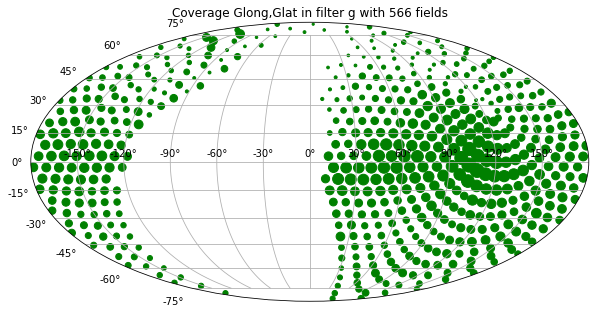

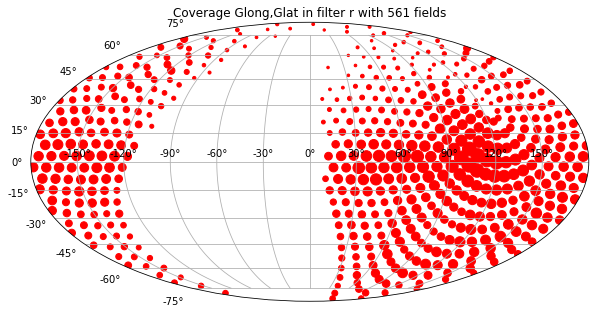

In [24]:
for fid in range(2):
    makeplot(fid, 'Glong', gglist[fid], 'Glat', gtlist[fid], nlist[fid])